# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-05-28 16:54:43--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-05-28 16:54:43--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [2]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [14]:
# Cargar el conjunto de datos (reemplazar 'ruta/del/archivo.csv' con la ruta del archivo real)
tweets= pd.read_csv('Gender_bias_spanish.csv')
tweets.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


In [4]:
tweets.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

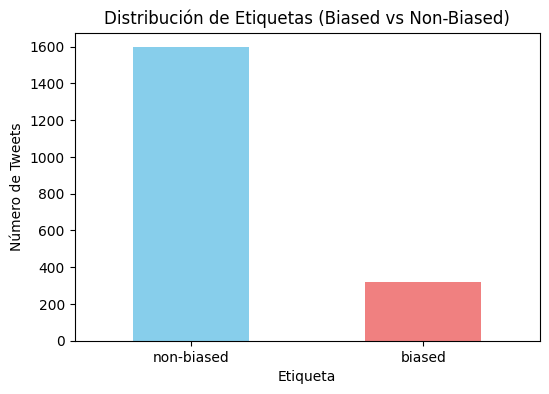

Distribución de Etiquetas:


,count
Label,
non-biased,1596
biased,318


In [7]:
label_counts = tweets['Label'].value_counts()

plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribución de Etiquetas (Biased vs Non-Biased)')
plt.xlabel('Etiqueta')
plt.ylabel('Número de Tweets')
plt.xticks(rotation=0)
plt.show()

print("Distribución de Etiquetas:")
label_counts

In [16]:
tweets['tweet_length'] = tweets['Contents'].apply(len)
print("\nLongitud promedio de los tweets:", tweets['tweet_length'].mean())

tweets['word_count'] = tweets['Contents'].apply(lambda x: len(x.split())) # Se reemplaza 'tweets' con 'Content'
print("Número promedio de palabras por tweet:", tweets['word_count'].mean())


Longitud promedio de los tweets: 92.62173458725182
Número promedio de palabras por tweet: 16.38244514106583


**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

Conocer la proporción de etiquetas ayuda a entender la naturaleza de tu conjunto de datos y a planificar estrategias de análisis y modelado adecuadas para abordar cualquier desequilibrio.

## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [17]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑüÜ\s]', '', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

tweets['clean_text'] = tweets['Contents'].apply(clean_text)

print("\nTweets después del preprocesamiento:")
print(tweets[['Contents', 'clean_text']].head())


Tweets después del preprocesamiento:
                                            Contents  \
0  @chumeltorres ya cabrón! sin tí se reciben las...   
1  ¿alguien es tan amable de ir a hacerme la comp...   
2  @jenniferduquee hahaha, si está rico, nadamas ...   
3  @evagelcot donde lo ves!!? es mi programa favo...   
4  como siempre mi tortilla triunfa mas que otros...   

                                          clean_text  
0  chumeltorres cabrón tí reciben noticias colcho...  
1  alguien tan amable ir hacerme compra mañana ba...  
2  jenniferduquee hahaha si rico nadamas falta pr...  
3  evagelcot ves programa favorito sólo encuentro...  
4          siempre tortilla triunfa mas platos playa  


## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.


Palabras más comunes en tweets 'biased':
[('si', 30), ('mujer', 23), ('mujeres', 19), ('ser', 17), ('así', 16), ('quiero', 14), ('q', 14), ('mejor', 13), ('mamá', 12), ('tan', 12)]

Palabras más comunes en tweets 'non-biased':
[('si', 167), ('gracias', 90), ('bien', 69), ('año', 65), ('quiero', 62), ('hoy', 62), ('día', 62), ('mejor', 62), ('tan', 59), ('días', 58)]


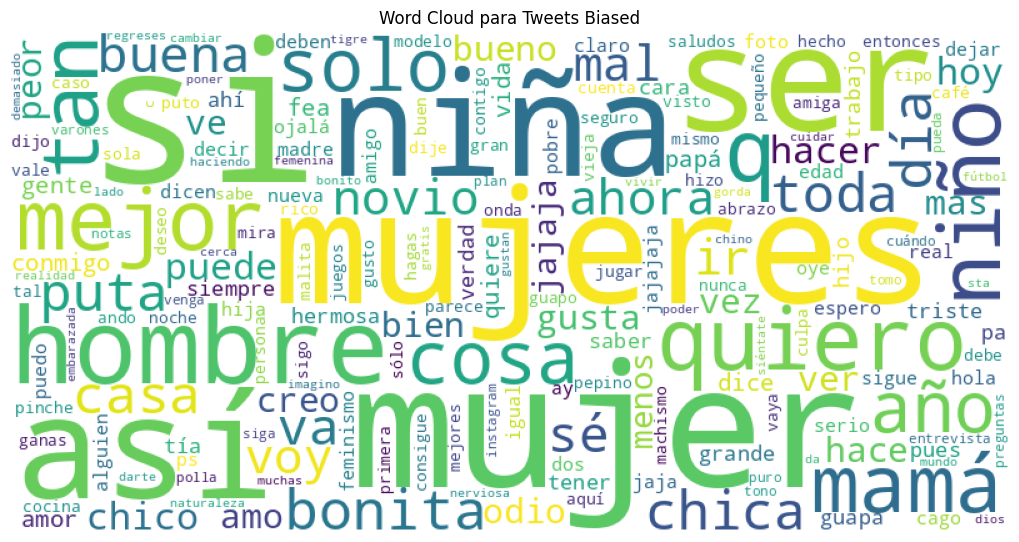

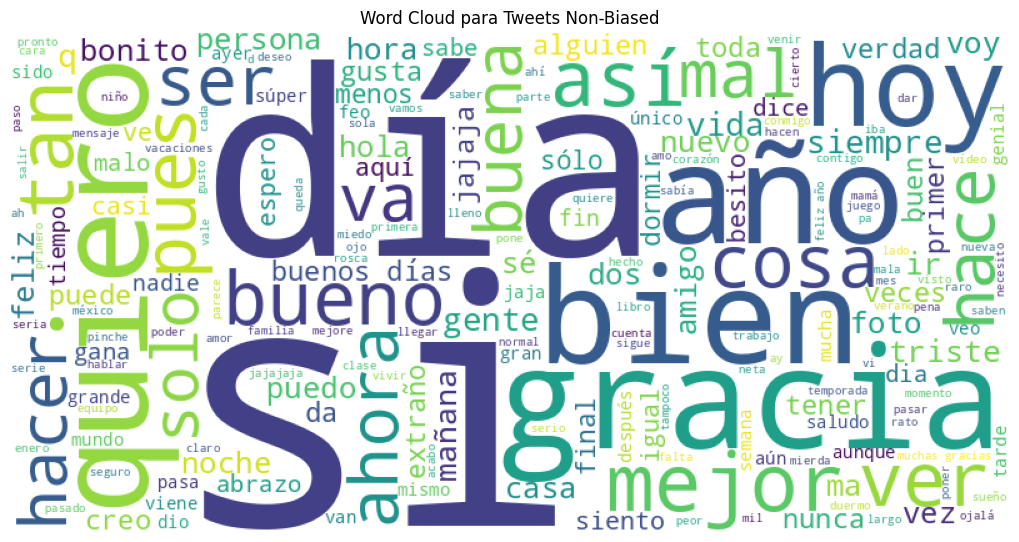

In [18]:
biased_tweets = tweets[tweets['Label'] == 'biased']['clean_text']
non_biased_tweets = tweets[tweets['Label'] == 'non-biased']['clean_text']

biased_word_counts = Counter(" ".join(biased_tweets).split())
non_biased_word_counts = Counter(" ".join(non_biased_tweets).split())

print("\nPalabras más comunes en tweets 'biased':")
print(biased_word_counts.most_common(10))

print("\nPalabras más comunes en tweets 'non-biased':")
print(non_biased_word_counts.most_common(10))

wordcloud_biased = WordCloud(width = 800, height = 400, background_color ='white').generate(" ".join(biased_tweets))
plt.figure(figsize = (10, 5), facecolor = None)
plt.imshow(wordcloud_biased)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud para Tweets Biased')
plt.show()

wordcloud_non_biased = WordCloud(width = 800, height = 400, background_color ='white').generate(" ".join(non_biased_tweets))
plt.figure(figsize = (10, 5), facecolor = None)
plt.imshow(wordcloud_non_biased)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud para Tweets Non-Biased')
plt.show()


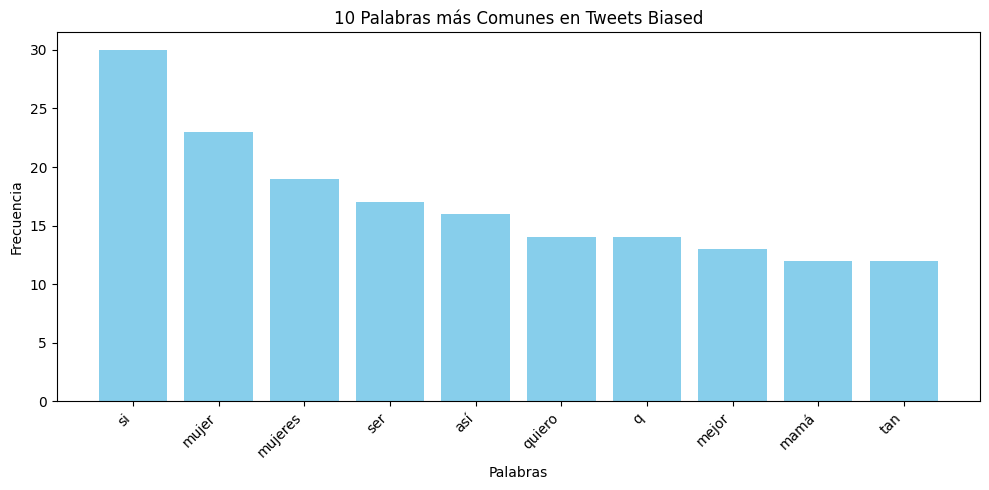

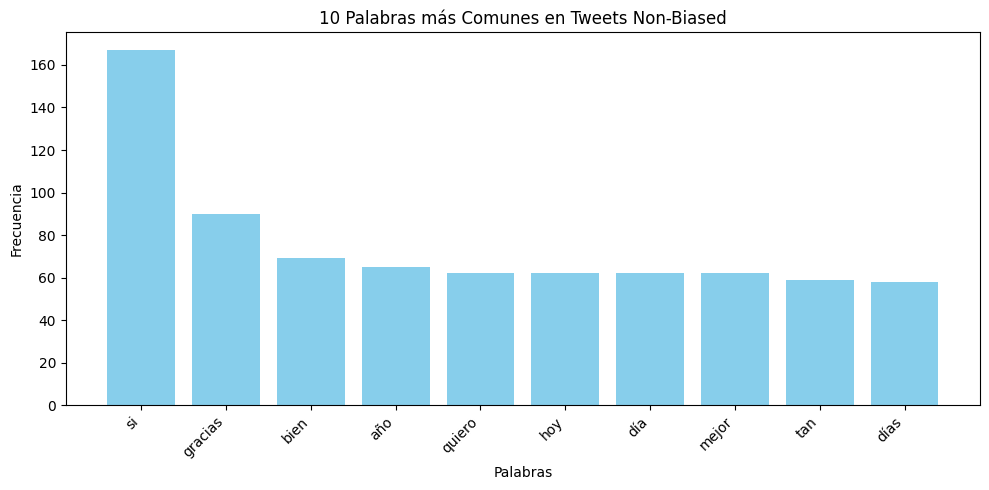

In [19]:
most_common_biased = biased_word_counts.most_common(10)
most_common_non_biased = non_biased_word_counts.most_common(10)

def plot_most_common_words(word_list, title):
    words, counts = zip(*word_list)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='skyblue')
    plt.title(title)
    plt.xlabel('Palabras')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_most_common_words(most_common_biased, '10 Palabras más Comunes en Tweets Biased')
plot_most_common_words(most_common_non_biased, '10 Palabras más Comunes en Tweets Non-Biased')

**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

Las palabras más comunes:
Tweets 'biased': Puedes ver la lista de las 10 palabras
* Tweets Biased: Si, Mujer y Mujeres
* Non-biased: Si y Gracias



Las palabras que sufieran sesgo
son las palabras que aparecen con alta frecuencia en la lista de tweets 'biased' pero con baja frecuencia o que no aparecen en la lista de tweets 'non-biased'.
*   Ser, así, q y mamá



El análisis del sesgo en los datos de texto, como los tweets, proporciona a las empresas información valiosa para ser más conscientes de las percepciones sesgadas, mejorar su comunicación, y promover prácticas más equitativas.

## 5. Análisis de Sentimientos
Usaremos `TextBlob` para calcular el sentimiento de cada tweet y luego compararemos la distribución de sentimientos entre tweets 'biased' y 'non-biased'.

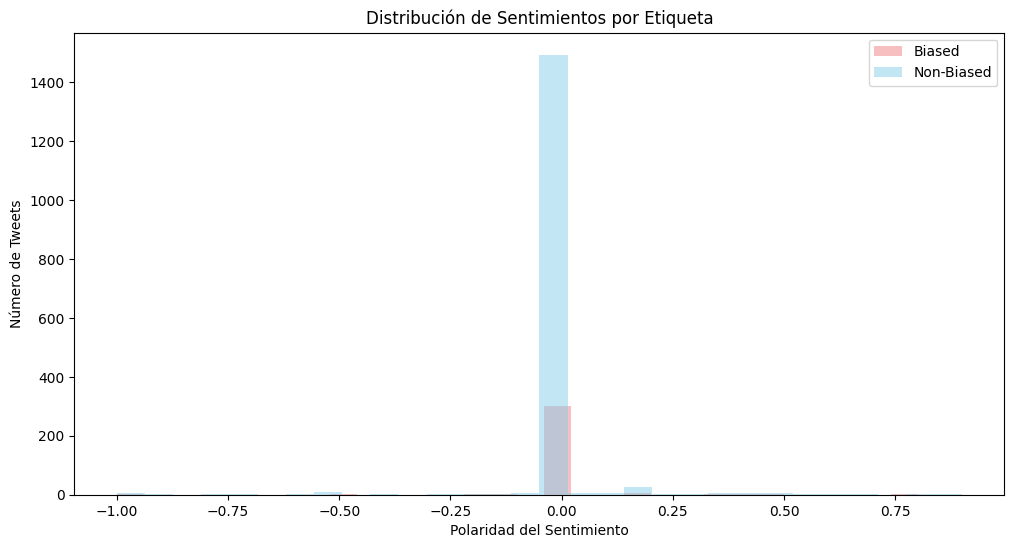


Estadísticas de Sentimiento para Tweets Biased:
count    318.000000
mean       0.001310
std        0.125048
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.800000
Name: sentiment, dtype: float64

Estadísticas de Sentimiento para Tweets Non-Biased:
count    1596.000000
mean        0.002296
std         0.105809
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.900000
Name: sentiment, dtype: float64


In [22]:
def get_sentiment(text):
    blob = TextBlob(text)
    try:
        if blob.detect_language() != 'en':
            blob = blob.translate(to='en')
    except:
        pass
    return blob.sentiment.polarity

tweets['sentiment'] = tweets['clean_text'].apply(get_sentiment)

# Comparar la distribución de sentimientos por etiqueta
sentiment_biased = tweets[tweets['Label'] == 'biased']['sentiment']
sentiment_non_biased = tweets[tweets['Label'] == 'non-biased']['sentiment']

plt.figure(figsize=(12, 6))
plt.hist(sentiment_biased, bins=30, alpha=0.5, label='Biased', color='lightcoral')
plt.hist(sentiment_non_biased, bins=30, alpha=0.5, label='Non-Biased', color='skyblue')
plt.title('Distribución de Sentimientos por Etiqueta')
plt.xlabel('Polaridad del Sentimiento')
plt.ylabel('Número de Tweets')
plt.legend()
plt.show()

print("\nEstadísticas de Sentimiento para Tweets Biased:")
print(sentiment_biased.describe())

print("\nEstadísticas de Sentimiento para Tweets Non-Biased:")
print(sentiment_non_biased.describe())

**Preguntas de Análisis de Sentimientos:**
- ¿Existe una diferencia notable en los sentimientos de tweets 'biased' vs 'non-biased'?
- ¿Qué indica esta diferencia sobre la naturaleza de los tweets sesgados?
- ¿Cómo podrías aplicar el análisis de sentimientos para entender la percepción del público sobre un tema específico?

 La gráfica de histograma muestra la distribución de la polaridad del sentimiento para cada categoría ('Biased' y 'Non-Biased'). Si las formas de los histogramas son significativamente diferentes, esto sugiere una diferencia en los sentimientos.

la diferencia en el sentimiento puede revelar si el sesgo está más relacionado con una crítica negativa, un apoyo entusiasta, o una mezcla de ambos, proporcionando así información sobre la forma en que se manifiesta el sesgo en el contenido de los tweets.

Se puede aplicar el análisis de sentimientos para entender la percepción del público sobre un tema específico de la siguiente manera:

- Recopilar datos: Obtener un conjunto de datos de texto relevante para el tema de interés. Esto podría ser tweets, comentarios de redes sociales, reseñas de productos, artículos de noticias, etc.

- Preprocesar el texto: Limpia y prepara el texto de manera similar a como lo hiciste en el cuaderno: elimina caracteres especiales, convierte a minúsculas, elimina stopwords, etc.

- Realizar análisis de sentimientos: al aplicar un modelo o herramienta de análisis de sentimientos (como TextBlob u otras bibliotecas más avanzadas) a cada pieza de texto se obtiene una puntuación de sentimiento (polaridad).

- Categorizar o agrupar los resultados: se puede clasificar el sentimiento en categorías como positivo, negativo y neutral basándote en los rangos de puntuación de polaridad.

- Visualizar y analizar los resultados: Creando visualizaciones como histogramas, gráficos de barras o gráficos circulares para mostrar la distribución del sentimiento. se calculan estadísticas descriptivas (media, mediana, etc.) para entender el sentimiento promedio y la variabilidad.

- Identificar tendencias y patrones: al buscar patrones en los datos. ¿La mayoría de las menciones son positivas o negativas? ¿Hay picos de sentimiento positivo o negativo en momentos específicos? ¿Hay subtemas dentro del tema principal que generen sentimientos particulares?

- Relacionar el sentimiento con otros datos: Si tenemos otros datos disponibles (por ejemplo, fechas, ubicaciones, información demográfica de los autores), se puede cruzar el análisis de sentimientos con esta información para obtener una comprensión más profunda de cómo varía la percepción entre diferentes grupos o en diferentes momentos.

## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

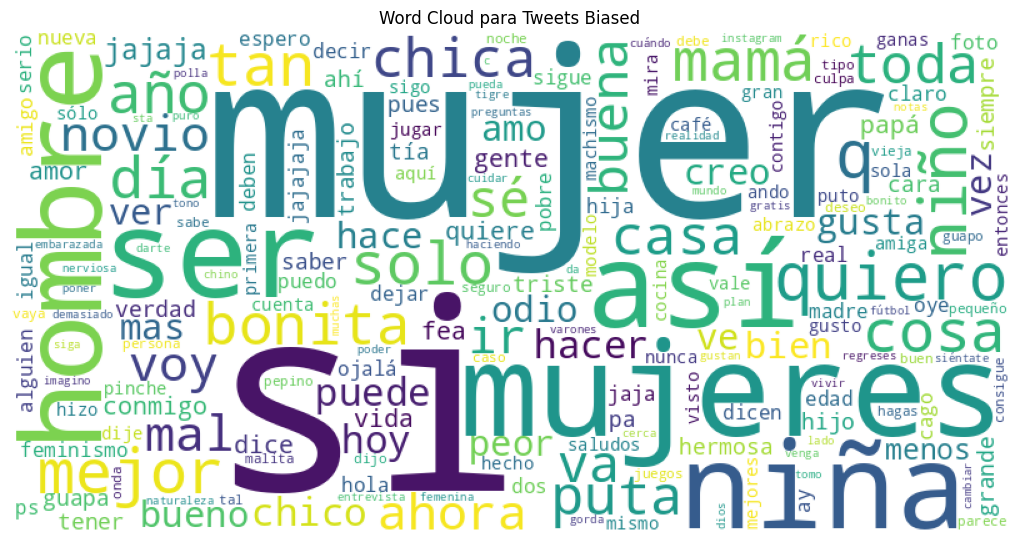

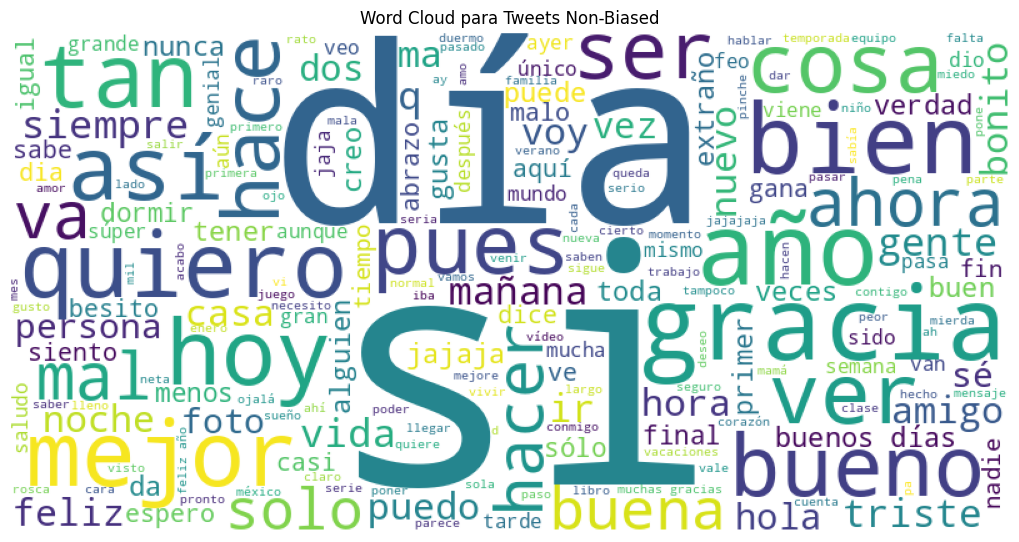

In [23]:
wordcloud_biased = WordCloud(width = 800, height = 400, background_color ='white').generate(" ".join(biased_tweets))
plt.figure(figsize = (10, 5), facecolor = None)
plt.imshow(wordcloud_biased)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud para Tweets Biased')
plt.show()

wordcloud_non_biased = WordCloud(width = 800, height = 400, background_color ='white').generate(" ".join(non_biased_tweets))
plt.figure(figsize = (10, 5), facecolor = None)
plt.imshow(wordcloud_non_biased)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud para Tweets Non-Biased')
plt.show()

## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

- Al comprender el lenguaje y las emociones asociadas con el sesgo y la neutralidad en las conversaciones en línea, una marca puede tomar decisiones informadas para crear una comunicación más consciente, efectiva e inclusiva.

- Enfrentar una predominancia de tweets 'biased' requiere un enfoque proactivo y reflexivo en la comunicación de marketing. Al identificar las raíces del sesgo y tomar medidas para contrarrestarlo a través del mensaje, el contenido y la interacción con la audiencia, una marca puede trabajar para construir una percepción más positiva e inclusiva.

- Los patrones importantes que podrías explorar en un análisis futuro para obtener una comprensión más profunda de los datos:

1. Análisis de tendencias a lo largo del tiempo:

Variación del sesgo y sentimiento: Si el conjunto de datos incluye información temporal (como la fecha de publicación de los tweets), se puede analizar cómo ha variado la proporción de tweets 'biased' y 'non-biased' con el tiempo. ¿Ha aumentado o disminuido el sesgo en ciertos períodos? ¿Cómo ha evolucionado el sentimiento asociado a los tweets 'biased' y 'non-biased'? Esto podría revelar nuevas tendencias en el lenguaje asociado al sesgo o a temas de discusión relevantes.

2. Análisis de n-gramas:

En lugar de analizar palabras individuales, se puede explorar la frecuencia de secuencias de dos o más palabras (bigramas, trigramas, etc.). Esto puede revelar frases o combinaciones de palabras que son particularmente relevantes en tweets 'biased' o 'non-biased', proporcionando un contexto más rico que las palabras aisladas.

3. Modelado de temas (Topic Modeling):

Utilizar técnicas como LDA (Latent Dirichlet Allocation) para identificar los temas principales presentes en los tweets. se puede aplicar el modelado de temas por separado a los tweets 'biased' y 'non-biased' para entender qué temas son más prevalentes en cada categoría. Esto te ayudará a identificar los temas específicos sobre los que se manifiesta el sesgo.

4. Análisis de redes sociales:

Si tenemos acceso a información sobre los usuarios que publicaron los tweets (por ejemplo, si son retweets o menciones), podriamos construir una red social para analizar las interacciones.

5. Análisis de sentimientos granular:

En lugar de solo polaridad general (positivo/negativo/neutral), podriamos utilizar herramientas de análisis de sentimientos más avanzadas que identifiquen emociones específicas (ira, alegría, tristeza, etc.) asociadas a los tweets 'biased' y 'non-biased'. Esto proporcionaría una comprensión más matizada del impacto emocional del sesgo.

6. Análisis de la lingüística del sesgo:

Explorar aspectos lingüísticos más profundos en los tweets 'biased', como el uso de adjetivos, adverbios, pronombres o estructuras gramaticales que puedan indicar subjetividad o posicionamiento sesgado.

7. Comparación con otros conjuntos de datos:

Comparar los patrones encontrados en este conjunto de datos de tweets con otros conjuntos de datos de texto (por ejemplo, noticias, comentarios de blogs) para ver si los patrones de sesgo y sentimiento son similares o diferentes en otras plataformas o tipos de contenido.